In [1]:
import matplotlib as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nn import NN

## Load data
We will be using a modified version of the MNIST dataset. Since this example is performing binary classification, the labels will indicate whether the image is of the digit `5`.

In [2]:
# download MNIST dataset
# this may take a couple minutes
X, y = fetch_openml('mnist_784', version=1, as_frame=False, return_X_y=True)
X.shape

(70000, 784)

In [3]:
# update labels for binary classification task
y = (y == '5')
y.shape

(70000,)

## Preprocessing

In [4]:
# standardize data to get feature values in range [0, 1]
X /= 255.

In [5]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y)

In [6]:
# X and y should have features along row axis
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

print('Training set')
print(X_train.shape, y_train.shape)
print('\nTest set')
print(X_test.shape, y_test.shape)

Training set
(784, 63000) (1, 63000)

Test set
(784, 7000) (1, 7000)


## Train Model

In [7]:
# model architecture will be:
    # input layer with 784 nodes
    # hidden layer with 32 nodes
    # hidden layer with 8 nodes
    # output layer with 1 node
layer_dims = [X_train.shape[0], 32, 8, 1]

Epoch 1, Cost  0.69, Acc  0.91,  Val Cost  0.69, Val Acc  0.91
Epoch 250, Cost  0.30, Acc  0.91,  Val Cost  0.30, Val Acc  0.91
Epoch 500, Cost  0.30, Acc  0.91,  Val Cost  0.30, Val Acc  0.91
Epoch 750, Cost  0.30, Acc  0.91,  Val Cost  0.29, Val Acc  0.91
Epoch 1000, Cost  0.21, Acc  0.91,  Val Cost  0.21, Val Acc  0.91
Epoch 1250, Cost  0.15, Acc  0.91,  Val Cost  0.15, Val Acc  0.91
Epoch 1500, Cost  0.10, Acc  0.97,  Val Cost  0.11, Val Acc  0.97
Epoch 1750, Cost  0.08, Acc  0.98,  Val Cost  0.08, Val Acc  0.98
Epoch 2000, Cost  0.06, Acc  0.98,  Val Cost  0.07, Val Acc  0.98


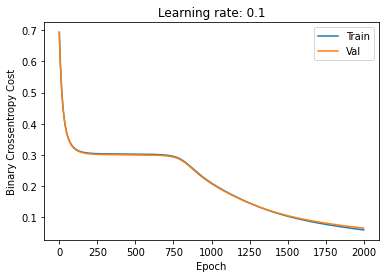

In [8]:
# create binary classification neural network
# validation set is 20% of training set
nn = NN(layer_dims)
nn.fit(X_train, y_train, val_size=0.2, learning_rate=0.1, n_epochs=2000, print_cost_interval=250)

## Evaluate performance on test set

In [9]:
from sklearn.metrics import classification_report

y_test_pred = nn.predict(X_test)
acc_test = accuracy_score(y_test.T, y_test_pred.T)

print(f'Test set accuracy: {acc_test: .2f}\n')
print(classification_report(y_test.T, y_test_pred.T))

Test set accuracy:  0.98

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      6369
        True       0.93      0.87      0.90       631

    accuracy                           0.98      7000
   macro avg       0.96      0.93      0.95      7000
weighted avg       0.98      0.98      0.98      7000

